In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
   
    return df

In [3]:
df = wrangle(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_training.csv')
print(df.shape)
df.head()

(22850, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [4]:
from sklearn import preprocessing

In [5]:
ler =preprocessing.LabelEncoder()
df["person_home_ownership"] = ler.fit_transform(df["person_home_ownership"])
df["loan_intent"] = ler.fit_transform(df["loan_intent"])
df["loan_grade"] = ler.fit_transform(df["loan_grade"])
df["cb_person_default_on_file"] = ler.fit_transform(df["cb_person_default_on_file"])

In [6]:
target = 'loan_status'
X = df.drop(columns = target)
y = df[target]

print("X:",X.shape)
print("y:",y.shape)

X: (22850, 11)
y: (22850,)


In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3, random_state = 42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)


X_train: (15995, 11)
X_test: (6855, 11)
y_train: (15995,)
y_test: (6855,)


In [9]:
clf = make_pipeline(SimpleImputer(),
                   GradientBoostingClassifier()
                   )

In [10]:
params = {"simpleimputer__strategy":["mean","median"],
         "gradientboostingclassifier__n_estimators":range(20,31,5),
          "gradientboostingclassifier__max_depth":range(2,5),
         }        

In [11]:
model = GridSearchCV(clf,param_grid= params,n_jobs= -1,verbose=1, cv =5)

In [12]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [13]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,1.129419,0.064531,0.005929,0.007478,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.922476,0.924664,0.919350,0.922788,0.922476,0.922351,0.001708,1
17,1.075945,0.059093,0.011374,0.006091,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.922476,0.924664,0.919350,0.922476,0.922476,0.922288,0.001696,2
15,0.950826,0.048741,0.007596,0.004029,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.920600,0.924351,0.917474,0.921225,0.919975,0.920725,0.002216,3
14,0.897556,0.014080,0.008920,0.005193,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.920600,0.924351,0.917474,0.921225,0.919975,0.920725,0.002216,3
13,0.730981,0.014090,0.009375,0.007655,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.917474,0.923414,0.917787,0.920288,0.919662,0.919725,0.002133,5
12,0.725528,0.002233,0.009375,0.007655,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.917474,0.923414,0.917787,0.920288,0.919662,0.919725,0.002133,5
11,0.864826,0.010119,0.008174,0.007025,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.907158,0.914348,0.905595,0.913098,0.898406,0.907721,0.005735,7
10,0.809543,0.044589,0.007865,0.006988,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.907158,0.914348,0.905595,0.913098,0.898406,0.907721,0.005735,7
9,0.640121,0.025572,0.007449,0.007025,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.903407,0.913410,0.901844,0.908096,0.896843,0.904720,0.005639,9
8,0.620477,0.027455,0.009377,0.007656,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.903407,0.913410,0.901844,0.908096,0.896843,0.904720,0.005639,9


In [14]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [15]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9253
Test Accuracy: 0.9236
Training Accuracy: 0.9253
Validation Accuracy: 0.9236


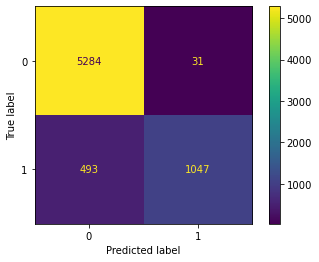

In [16]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [17]:
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5315
           1       0.97      0.68      0.80      1540

    accuracy                           0.92      6855
   macro avg       0.94      0.84      0.88      6855
weighted avg       0.93      0.92      0.92      6855



In [18]:
df1 = pd.read_csv(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_test.csv')
print(df1.shape)
df1.head()

df1["person_emp_length"].fillna( method ='ffill', inplace = True)
df1["loan_int_rate"].fillna( method ='ffill', inplace = True)

ler =preprocessing.LabelEncoder()
df1["person_home_ownership"] = ler.fit_transform(df1["person_home_ownership"])
df1["loan_intent"] = ler.fit_transform(df1["loan_intent"])
df1["loan_grade"] = ler.fit_transform(df1["loan_grade"])
df1["cb_person_default_on_file"] = ler.fit_transform(df1["cb_person_default_on_file"])

(9731, 12)


In [19]:
df1 = df1.drop(columns = "loan_status")
df1.shape

(9731, 11)

D:\Stats_software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


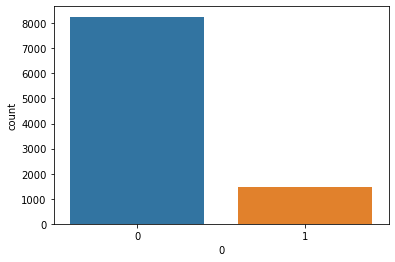

In [20]:
y_pred = model.predict(df1)
y_pred_data =pd.DataFrame(y_pred)
sns.countplot(y_pred_data[0]);

In [21]:
pd.DataFrame(y_pred)

,0
0,1
1,1
2,1
3,1
4,1
...,...
9726,0
9727,0
9728,1
9729,0


In [22]:
confusion_matrix(y.head(9731),y_pred)

array([[6431, 1071],
       [1831,  398]], dtype=int64)